<a href="https://colab.research.google.com/github/lucasace/cricket/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
score = pd.read_csv('Aaron Finch  (Australia).csv')
dates = pd.read_csv('Aaron Finch  (Australia)1.csv')

In [0]:
result = dates.merge(score,how='left', left_on='matchid', right_on='match_id')
result.drop(['how dismissed', 'match_id'], axis=1, inplace=True)

result.matchid = result.matchid.apply(lambda x: 1 if 'ODI' in x else 0)
result = result[result['matchid'] != 0]
result = result[result['score'] != '-']
result = result.reindex(index=result.index[::-1]).reset_index()
result.drop(['matchid', 'index', 'date','batting position'], axis=1, inplace=True)
#result

In [4]:
result = result.apply(pd.to_numeric)
result['runs'] = result['score'] - 4*result['4s'] - 6*(2*result['6s'])
result

,score,strike rate,4s,6s,runs
0,11,166.67,1,0,10
1,4,26.67,0,0,4
2,6,100.00,1,0,5
3,13,50.00,2,0,11
4,182,129.82,16,7,152
...,...,...,...,...,...
117,22,73.08,1,1,19
118,11,83.33,1,0,10
119,71,80.00,3,2,64
120,83,79.31,6,2,73


In [0]:
def segment(i):
  if len(i) > 5:
    j = 6
    x=[]
    while j<=len(i):
      x.append(i[j-6:j-1])
      j+=1
  else:
    return 0
  return x

In [0]:
X5 = list(result['score'])
X5 = np.array(segment(X5))

from sklearn.linear_model import LinearRegression

regr = LinearRegression(fit_intercept=True)
preds = []

for i in X5:
  y_train = np.array(i).reshape(-1,1)
  X_train = np.array(range(5)).reshape(-1,1)
  regr.fit(X_train, y_train)           
  pred = regr.predict(np.array(5).reshape(1,-1))
  preds.append(pred[0][0])

preds = np.array(preds)
preds[preds < 0] = 0

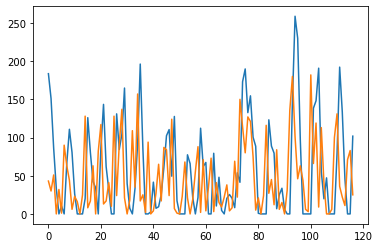

In [9]:
y_temp = list(result['score'])
y_temp = y_temp[5:]
plt.plot(preds)
plt.plot(y_temp)
plt.show()